In [1]:
#importing libraries

%matplotlib inline

import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

import tensorflow as tf
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sn

Using TensorFlow backend.


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv('mnist_train.csv')
test = pd.read_csv('mnist_test.csv')

In [4]:
train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
test.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# data = pd.concat([train, test])
data = train

In [44]:
#reshaping into 28X28 array
# data.iloc[3, 1:].values.reshape(28, 28).astype('uint8')
# test.iloc[3, 1:].values.reshape(28, 28).astype('uint8')

In [49]:
#preprocessing data
#Storing Pixel array in form length width and channel in df_x
df_x = data.iloc[:, 1:].values.reshape(len(data), 28, 28, 1)
test_df_x = test.iloc[:, 1:].values.reshape(len(test), 28, 28, 1)

In [48]:
#Storing the labels in y
y = data.iloc[:, 0].values

##
test_y = test.iloc[:, 0].values
##

In [45]:
#Converting labels to categorical features
df_y = keras.utils.to_categorical(y, num_classes=10)

##
test_df_y = keras.utils.to_categorical(test_y, num_classes=10)
##

In [11]:
df_x = np.array(df_x)
df_y = np.array(df_y)

test_df_x = np.array(test_df_x)
test_df_y = np.array(test_df_y)

In [12]:
#test train split
x_train, x_test, y_train, y_test = train_test_split(df_x,df_y,test_size=0.8,random_state=4)
# x_train, x_test, y_train, y_test = df_x, df_y, test_df_x, test_df_y 

In [13]:
#CNN model
model = Sequential()

In [14]:
# Layer 1
model.add(Convolution2D(32,3,data_format='channels_last',activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

In [15]:
# Layer 2
model.add(Convolution2D(32,3,data_format='channels_last',activation='relu',input_shape=(13,13,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

In [16]:
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

In [17]:
model.compile(loss='categorical_crossentropy', optimizer = 'adadelta', metrics = ['accuracy'])

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 800)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)               

In [19]:
#Fitting into the model
model.fit(x_train, y_train, epochs = 10, validation_data=(x_test, y_test))

Train on 12000 samples, validate on 48000 samples
Epoch 1/10
12000/12000 [==============================] - 9s 777us/step - loss: 2.6293 - accuracy: 0.6144 - val_loss: 0.3075 - val_accuracy: 0.9079
Epoch 2/10
12000/12000 [==============================] - 9s 763us/step - loss: 0.5248 - accuracy: 0.8434 - val_loss: 0.2074 - val_accuracy: 0.9364
Epoch 3/10
12000/12000 [==============================] - 9s 768us/step - loss: 0.3616 - accuracy: 0.8942 - val_loss: 0.1616 - val_accuracy: 0.9512
Epoch 4/10
12000/12000 [==============================] - 9s 779us/step - loss: 0.2823 - accuracy: 0.9185 - val_loss: 0.1292 - val_accuracy: 0.9602
Epoch 5/10
12000/12000 [==============================] - 9s 765us/step - loss: 0.2347 - accuracy: 0.9302 - val_loss: 0.1209 - val_accuracy: 0.9643
Epoch 6/10
12000/12000 [==============================] - 9s 753us/step - loss: 0.2093 - accuracy: 0.9355 - val_loss: 0.1070 - val_accuracy: 0.9673
Epoch 7/10
12000/12000 [==============================] - 9s 7

In [36]:
model.evaluate(test_df_x, test_df_y)

10000/10000 [==============================] - 1s 96us/step


[0.09241218119459227, 0.9729999899864197]

In [37]:
predictions = model.predict(test_df_x)

In [46]:
rounded_predictions = model.predict_classes(test_df_x, batch_size = 10, verbose = 0)

In [40]:
test_y = np.argmax(test_df_y, axis = 1)
conf_matrix = confusion_matrix(test_y, rounded_predictions)

In [47]:
class_names = list(set(test_y))

In [42]:
df_cm = pd.DataFrame(conf_matrix, index = [i for i in class_names],
                  columns = [i for i in class_names])

(10.0, 0.0)

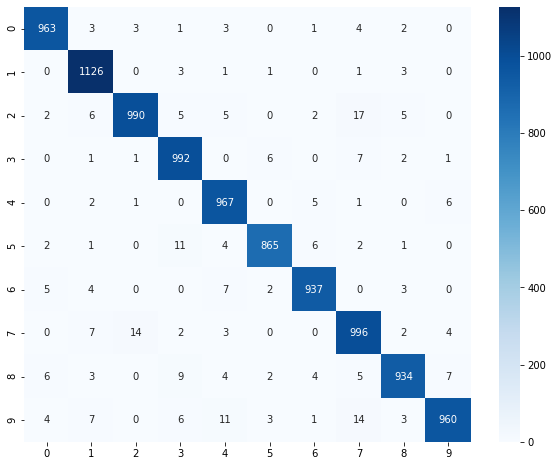

In [43]:
plt.figure(figsize = (10,8))
# sn.heatmap(df_cm, annot=True, cmap="Blues", fmt='g')


ax = sn.heatmap(df_cm, annot=True, cmap="Blues", fmt='g') #notation: "annot" not "annote"
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)